# Optimal Transport and Wasserstein Distances

The goal of this class is to introduce computational optimal transport, and implement some applications of optimal transport in machine learning.

In the first part of the class, you will familiarize yourself with optimal transport and learn to compute optimal transport distances (also called Wasserstein distances).

In the second part of the class, you will use optimal transport as a nice geometrical tool in machine learning.

In this class, you will need to install the package ``POT``:
* Install with pip: ```bash pip install pot```
* Install with conda: ```bash conda install -c conda-forge pot ```

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from mpl_toolkits.mplot3d import Axes3D
import ot

## 1. Computational Optimal Transport: Linear Programming and Sinkhorn Algorithm

Optimal Transport is a theory that allows us to compare two (weighted) points clouds $(X, a)$ and $(Y, b)$, where $X \in \mathbb{R}^{n \times d}$ and $Y \in \mathbb{R}^{m \times d}$ are the locations of the $n$ (resp. $m$) points in dimension $d$, and $a \in \mathbb{R}^n$, $b \in \mathbb{R}^m$ are the weights. We ask that the total weights sum to one, i.e. $\sum_{i=1}^n a_i = \sum_{j=1}^m b_j = 1$.

The basic idea of Optimal Transport is to "transport" the mass located at points $X$ to the mass located at points $Y$.

Let us denote by $\mathcal{U}(a,b) = \left\{ P \in \mathbb{R}^{n \times m} \,|\, P \geq 0, \sum_{j=1}^m P_{ij} = a_i, \sum_{i=1}^n P_{ij} = b_j\right\}$.

If $P \in \mathcal{U}(a,b)$, the quantity $P_{ij} \geq 0$ should be regarded as the mass transported from point $X_i$ to point $Y_j$. For this reason, it is called a "transport plan".

For any transport plan $P \in \mathcal{U}(a,b)$, we define its cost $K_C(P) := \langle C, P \rangle = \sum_{ij} C_{ij }P_{ij}$ where $C \in \mathbb{R}^{n \times m}$. The value $C_{ij}$ should be regarded as the cost, or price, we must pay for transporting a unit of mass from point $X_i$ to point $Y_j$, and is often chosen as $C_{ij} = \|X_i - Y_j\|^2$.

In "Optimal Transport", there is the word _Optimal_. Indeed, we want to find a transport plan $P \in \mathcal{U}(a,b)$ that will minimize the cost $K_C$. In other words, we want to solve
$$
    \min_{P \in \mathcal{U}(a,b)} K_C(P) = \min_{P \in \mathcal{U}(a,b)} \sum_{ij} C_{ij }P_{ij}
$$

This problem is a Linear Program: the objective function is linear, and the constraints are linear. We can thus solve this problem using classical Linear Programming algorithms, such as the simplex algorithm.

If $P^*$ is a solution to the Optimal Transport problem, we will say that $P^*$ is an optimal transport plan between $(X, a)$ and $(Y, b)$, and that $K_C(P^*)$ is the optimal transport distance (or Wasserstein distance) between $(X, a)$ and $(Y, b)$.

### 1.a. Computing Optimal "Croissant" Transport

We will solve the Bakery/Cafés problem of transporting croissants from a number of Bakeries to Cafés in a City (In this case Manhattan). We did a quick google map search in Manhattan for bakeries and Cafés:

![bak.png](https://remi.flamary.com/cours/otml/bak.png)

We extracted from this search their positions and generated fictional production and sale number (that both sum to the same value).

We have acess to the position of Bakeries ```bakery_pos``` and their respective production ```bakery_prod``` which describe the source distribution. The Cafés where the croissants are sold are defiend also by their position ```cafe_pos``` and ```cafe_prod```. For fun we also provide a map ```Imap``` that will illustrate the position of these shops in the city.

In [5]:
# Load the data
data = np.load('data/manhattan.npz')

bakery_pos = data['bakery_pos']
bakery_prod = data['bakery_prod']
cafe_pos = data['cafe_pos']
cafe_prod = data['cafe_prod']
Imap = data['Imap']

print('Bakery production: {}'.format(bakery_prod))
print('Cafe sale: {}'.format(cafe_prod))
print('Total croissants : {}'.format(cafe_prod.sum()))

Bakery production: [31. 48. 82. 30. 40. 48. 89. 73.]
Cafe sale: [82. 88. 92. 88. 91.]
Total croissants : 441.0


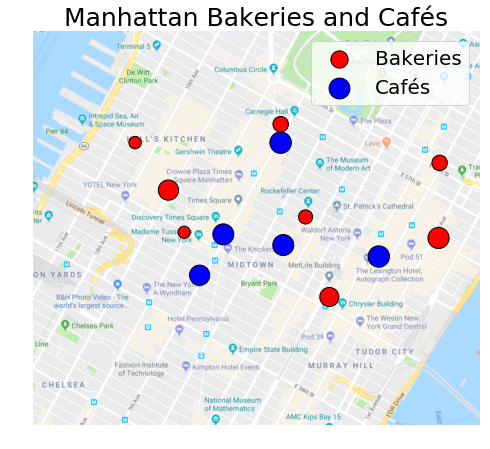

In [6]:
plt.figure(figsize=(8,8))
plt.imshow(Imap, interpolation='bilinear') # plot the map
plt.scatter(bakery_pos[:,0], bakery_pos[:,1], s=5*bakery_prod, c='r', edgecolors='k', label='Bakeries')
plt.scatter(cafe_pos[:,0], cafe_pos[:,1], s=5*cafe_prod, c='b', edgecolors='k', label='Cafés')
plt.legend(fontsize=20)
plt.axis('off')
plt.title('Manhattan Bakeries and Cafés', fontsize=25);

Let us now compute the cost matrix $C \in \mathbb{R}^{n \times m}$.

In [7]:
C = np.zeros((8,5))
for i in range(8):
    for j in range(5):
        C[i,j] = np.linalg.norm(bakery_pos[i]-cafe_pos[j])

We can now compute the optimal transport plan to transport the croissants from the bakeries to the cafés.

In [5]:
optimal_plan = ot.emd(bakery_prod, cafe_prod, C)
print(optimal_plan)
optimal_cost = np.sum(optimal_plan*C)
print(optimal_cost)

[[ 0. 31.  0.  0.  0.]
 [ 0.  0. 48.  0.  0.]
 [52. 30.  0.  0.  0.]
 [30.  0.  0.  0.  0.]
 [ 0. 27.  0. 13.  0.]
 [ 0.  0. 44.  2.  2.]
 [ 0.  0.  0.  0. 89.]
 [ 0.  0.  0. 73.  0.]]
10838179.409852047


In [8]:
optimal_plan = ot.emd(bakery_prod, cafe_prod, C)
print(optimal_plan)
optimal_cost = np.sum(optimal_plan*C)
print(optimal_cost)

[[ 0. 31.  0.  0.  0.]
 [ 0.  0. 48.  0.  0.]
 [25. 57.  0.  0.  0.]
 [30.  0.  0.  0.  0.]
 [ 0.  0.  0. 40.  0.]
 [ 0.  0. 44.  2.  2.]
 [ 0.  0.  0.  0. 89.]
 [27.  0.  0. 46.  0.]]
61523.15971278249


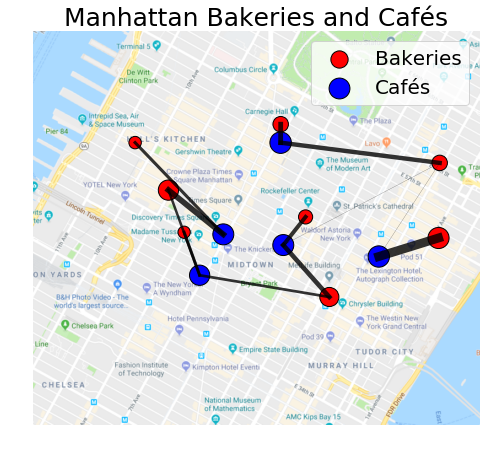

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(Imap, interpolation='bilinear')
plt.scatter(bakery_pos[:,0], bakery_pos[:,1], s=5*bakery_prod, c='r', edgecolors='k', label='Bakeries')
plt.scatter(cafe_pos[:,0], cafe_pos[:,1], s=5*cafe_prod, c='b', edgecolors='k', label='Cafés')
for i in range(8):
    for j in range(5):
        plt.plot([bakery_pos[i,0], cafe_pos[j,0]], [bakery_pos[i,1], cafe_pos[j,1]], c='k', lw=0.1*optimal_plan[i,j], alpha=0.8)
plt.legend(fontsize=20)
plt.axis('off')
plt.title('Manhattan Bakeries and Cafés', fontsize=25);

### 1.b Entropy Regularized Optimal Transport

In real applications, and especially in Machine Learning, we often have to deal with huge numbers of points. In this case, the linear programming algorithms which are cubic will take too much time to run.

That's why, in practise, people minimize another criterion given by
$$
    \min_{P \in \mathcal{U}(a,b)} \langle C, P \rangle + \epsilon \sum_{ij} P_{ij} [ \log(P_{ij}) - 1].
$$
When $\epsilon$ is sufficiently small, we can consider that a solution to the above problem (often refered to as "Entropy-regularized Optimal Transport") is a good approximation of a real optimal transport plan.

In order to solve this problem, one can remark that the optimality conditions imply that a solution $P_\epsilon^*$ necessarily is of the form $P_\epsilon^* = \text{diag}(u) \, K \, \text{diag}(v)$, where $K = \exp(-C/\epsilon)$ and $u,v$ are two non-negative vectors.

$P_\epsilon^*$ should verify the constraints, i.e. $P_\epsilon^* \in \mathcal{U}(a,b)$, so that
$$
    P_\epsilon^* 1_m = a \text{  and  } (P_\epsilon^*)^T 1_n = b
$$
which can be rewritten as
$$
    u \odot (Kv) = a \text{  and  } v \odot (K^T u) = b
$$

Then Sinkhorn's algorithm alternate between the resolution of these two equations, and reads
$$
    u \leftarrow \frac{a}{Kv} \text{  and  } v \leftarrow \frac{b}{K^T u}
$$

In [10]:
def sinkhorn(a, b, C, epsilon=0.1, max_iters=100):
    """Run Sinnkhorn's algorithm"""
    K = np.exp(-C/epsilon)
    
    v = np.ones(b.shape[0])
    for _ in range(max_iters):
        u = a / (np.dot(K,v))
        v = b / (np.dot(np.transpose(K),u))
    
    return np.diag(u).dot(K).dot(np.diag(v))

In [21]:
sinkhorn(bakery_prod, cafe_prod, C/C.max(), epsilon=0.00001)

/Users/francoispierrepaty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

In [18]:
optimal_plan

array([[ 0., 31.,  0.,  0.,  0.],
       [ 0.,  0., 48.,  0.,  0.],
       [25., 57.,  0.,  0.,  0.],
       [30.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 40.,  0.],
       [ 0.,  0., 44.,  2.,  2.],
       [ 0.,  0.,  0.,  0., 89.],
       [27.,  0.,  0., 46.,  0.]])

We first show that this algorithm is consistent with classical optimal transport, using the "croissant" transport example.

In [11]:
plan_diff = []
distance_diff = []
for epsilon in np.linspace(0.01, 1, 100):
    optimal_plan_sinkhorn = sinkhorn(bakery_prod, cafe_prod, C/C.max(), epsilon)
    optimal_cost_sinkhorn = np.sum(optimal_plan_sinkhorn*C)
    plan_diff.append(np.linalg.norm(optimal_plan_sinkhorn-optimal_plan)/cafe_prod.sum())
    distance_diff.append(100*np.abs(optimal_cost_sinkhorn-optimal_cost)/optimal_cost)

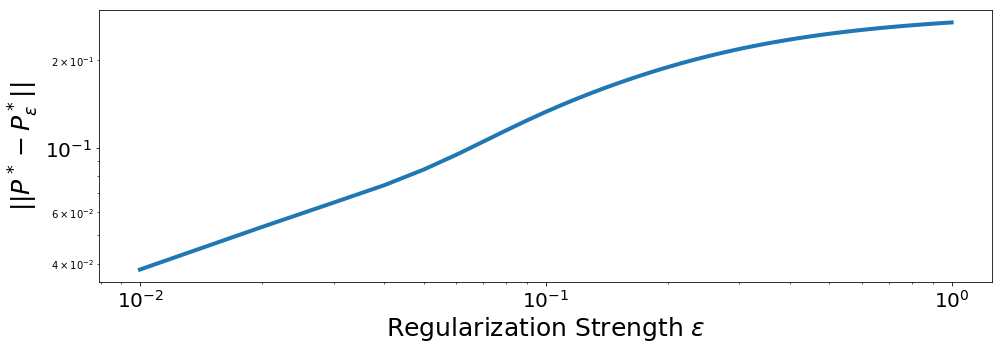

In [12]:
plt.figure(figsize=(16,5))
plt.loglog(np.linspace(0.01, 1, 100), plan_diff, lw=4)
plt.xlabel('Regularization Strength $\epsilon$', fontsize=25)
plt.ylabel('$||P^* - P_\epsilon^*||$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

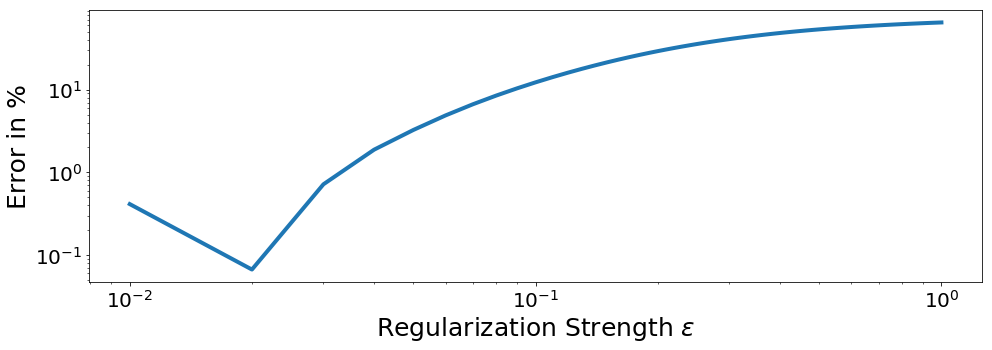

In [13]:
plt.figure(figsize=(16,5))
plt.loglog(np.linspace(0.01, 1, 100), distance_diff, lw=4)
plt.xlabel('Regularization Strength $\epsilon$', fontsize=25)
plt.ylabel('Error in %', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Let us now compare the running time for sinkhorn and classical optimal transport algorithm on more data.

In [22]:
n = 1000
m = 1000
d = 2

X = np.random.randn(n,d)
Y = np.random.randn(m,d)

a = np.ones(n)
b = np.ones(m)

C = np.zeros((n,m))
for i in range(n):
    for j in range(n):
        C[i,j] = np.linalg.norm(X[i] - Y[j])**2

In [12]:
%timeit ot.emd(a,b,C)

123 ms ± 5.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%timeit sinkhorn(a,b,C)

29.3 ms ± 395 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


We see that sinkhorn is faster. What is even more interesting is that sinkhorn can be parallelerized on GPUs, giving further acceleration.

### 1.c Optimal Transport in 1D

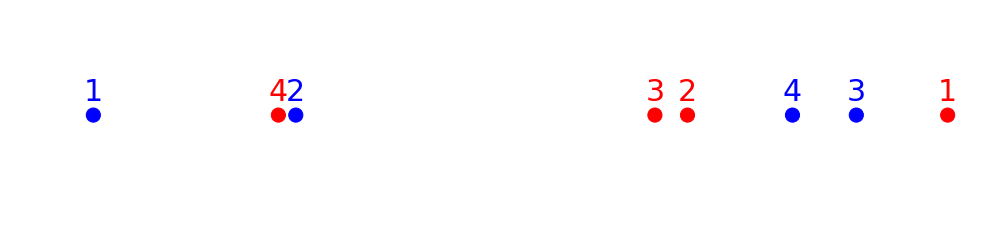

In [106]:
n = 4
m = 4

X = np.random.randn(n)
Y = np.random.randn(m)

a = np.ones(n)
b = np.ones(m)

plt.figure(figsize=(17,4))
plt.scatter(X, np.zeros(n), s=200*a, c='r')
plt.scatter(Y, np.zeros(m), s=200*b, c='b')
for i in range(n):
    plt.gca().annotate(str(i+1), xy=(X[i],0.005), size=30, color='r', ha='center')
for j in range(m):
    plt.gca().annotate(str(j+1), xy=(Y[j],0.005), size=30, color='b', ha='center')
plt.axis('off')
plt.show()

In [107]:
C = np.zeros((n,m))
for i in range(n):
    for j in range(n):
        C[i,j] = (X[i] - Y[j])**2

In [108]:
optimal_plan = ot.emd(a, b, C)
optimal_plan_sinkhorn = sinkhorn(a, b, C, epsilon=0.02, max_iters=1000)

In [109]:
optimal_plan

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [110]:
np.round(optimal_plan_sinkhorn,  2)

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

## 2. Application of Optimal Transport in Machine Learning: Color Transfer

We will now use optimal transport in color transfer. We are given two pictures, and the goal is to transfer the color of the first one to the other.

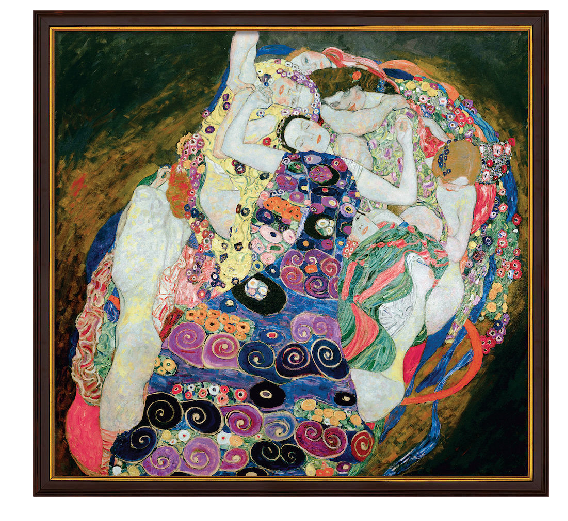

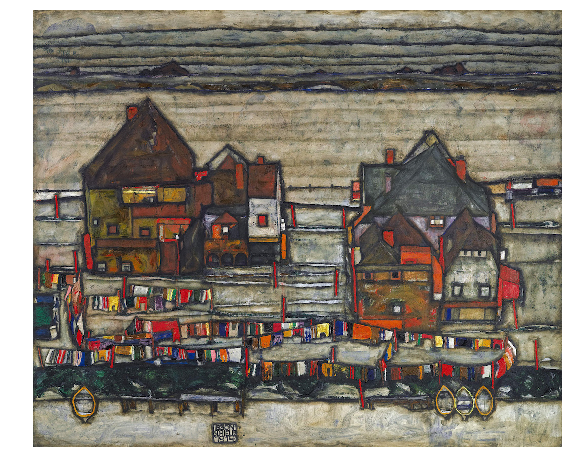

In [111]:
I1 = imread('./data/klimt.jpg').astype(np.float64) / 256
I2 = imread('./data/schiele.jpg').astype(np.float64) / 256

def showImage(I,myPreferredFigsize=(8,8)):
    plt.figure(figsize=myPreferredFigsize)
    plt.imshow(I)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

showImage(I1)
showImage(I2)

In [112]:
I1.shape

(943, 1000, 3)

Those are two beautiful paintings of respectively Gustav Klimt and Egon Schiele. Now we will treat them as empirical distributions, in the color space.

In [113]:
def im2mat(I):
    """Converts and image to matrix (one pixel per line)"""
    return I.reshape(-1,3)

def mat2im(X, shape):
    """Converts back a matrix to an image"""
    return X.reshape(shape)

X1 = im2mat(I1)
X2 = im2mat(I2)

We will need to plot the distributions in the color space, using the following function:

In [114]:
def showImageAsPointCloud(X, myPreferredFigsize=(8,8)):
    fig = plt.figure(figsize=myPreferredFigsize)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(0,1)
    ax.scatter(X[:,0], X[:,1], X[:,2], c=X, s=50, marker='o', alpha=1.0)
    ax.set_xlabel('R',fontsize=22)
    ax.set_xticklabels([])
    ax.set_ylim(0,1)
    ax.set_ylabel('G',fontsize=22)
    ax.set_yticklabels([])
    ax.set_zlim(0,1)
    ax.set_zlabel('B',fontsize=22)
    ax.set_zticklabels([])
    ax.grid('off')
    plt.show()

It is unlikely that our solver, as efficient it can be, can handle so large distributions (1Mx1M for the coupling). We will use the Mini batch k-means procedure from sklearn to subsample those distributions. Write the code that performs this subsampling (you can choose a size of 50 clusters to have a good approximation of the image).
__Note that computing the centroids can take some time.__

/Users/francoispierrepaty/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)
/Users/francoispierrepaty/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)
/Users/francoispierrepaty/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)
/Users/francoispierrepaty/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


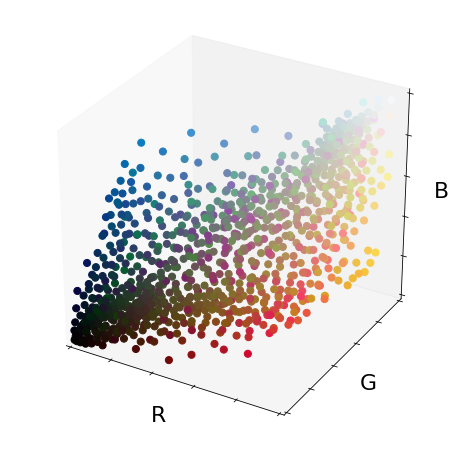

/Users/francoispierrepaty/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)
/Users/francoispierrepaty/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)
/Users/francoispierrepaty/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)
/Users/francoispierrepaty/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


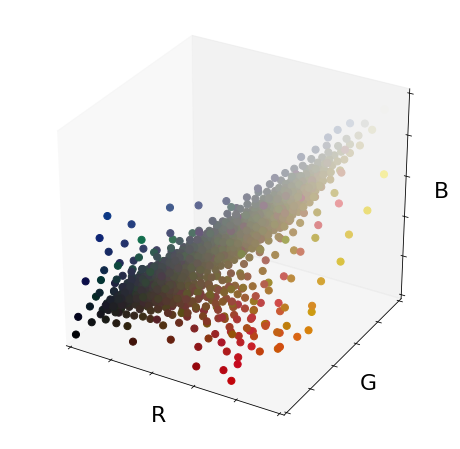

In [129]:
from sklearn.cluster import MiniBatchKMeans

nbsamples = 1000

kmeans1 = MiniBatchKMeans(n_clusters=nbsamples).fit(X1)
X1_sampled = kmeans1.cluster_centers_
showImageAsPointCloud(X1_sampled)


kmeans2 = MiniBatchKMeans(n_clusters=nbsamples).fit(X2)
X2_sampled = kmeans2.cluster_centers_
showImageAsPointCloud(X2_sampled)

Let us now compute the optimal transport plan between X1_sampled and X2_sampled using ``ot.emd``.

In [130]:
C = np.zeros((nbsamples, nbsamples))
for i in range(nbsamples):
    for j in range(nbsamples):
        C[i,j] = np.linalg.norm(X1_sampled[i]-X2_sampled[j])**2

optimal_transport_plan = ot.emd(np.ones(nbsamples), np.ones(nbsamples), C)

Since only the centroid of clusters have changed, we need to figure out a simple way of transporting all the pixels in the original image. We will apply a simple strategy where the new value of the pixel corresponds simply to the new position of its corresponding centroid.

In [131]:
X1_transformed = np.array([kmeans2.cluster_centers_[np.where(optimal_transport_plan[i]==1.)[0][0]] \
                           for i in kmeans1.labels_])

In [132]:
I1_transformed = mat2im(X1_transformed, I1.shape)

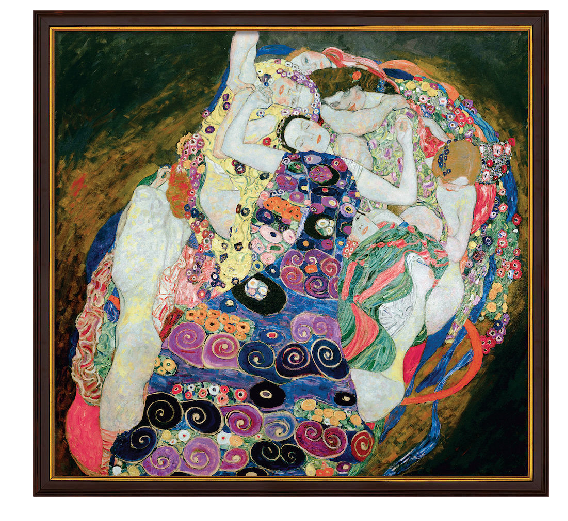

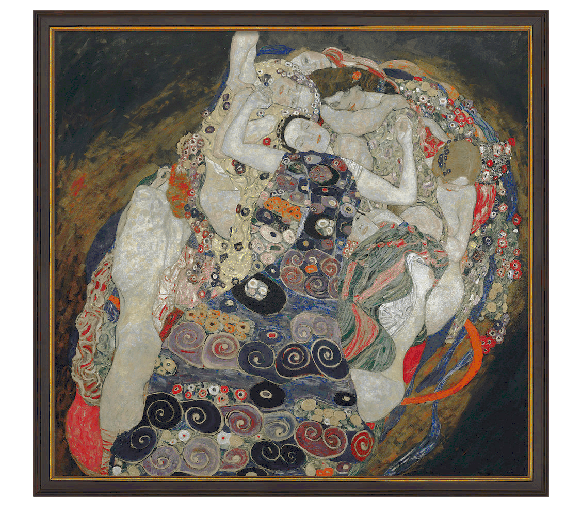

In [133]:
showImage(I1)
showImage(I1_transformed)

In [134]:
X2_transformed = np.array([kmeans1.cluster_centers_[np.where(optimal_transport_plan[:,j]==1.)[0][0]] \
                           for j in kmeans2.labels_])

In [135]:
I2_transformed = mat2im(X2_transformed, I2.shape)

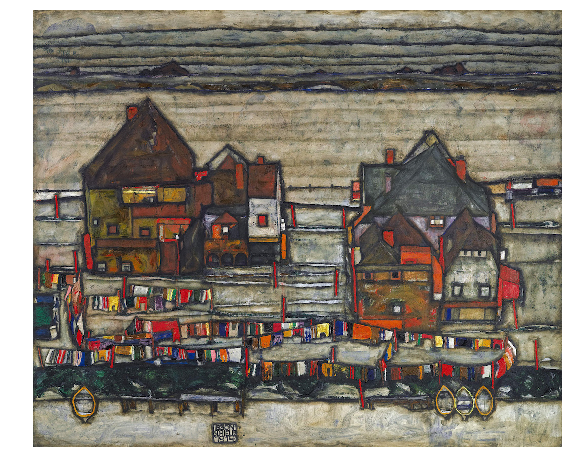

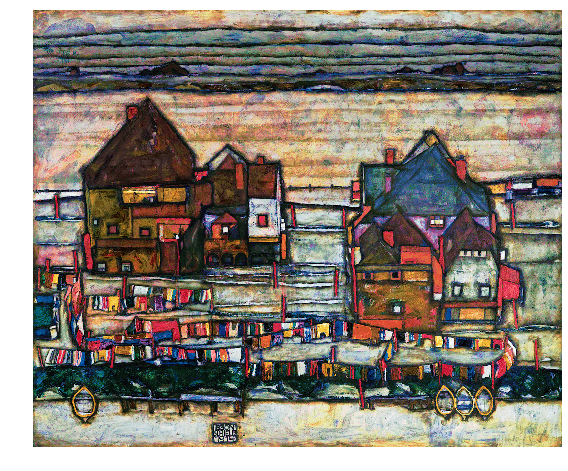

In [136]:
showImage(I2)
showImage(I2_transformed)

### Geodesic in the Wasserstein space

In [137]:
X1_1 = np.array([kmeans2.cluster_centers_[np.where(optimal_transport_plan[i]==1.)[0][0]] for i in kmeans1.labels_])
def X1_transform(t):
    return t*X1 + (1-t)*X1_1

In [ ]:
import imageio

images = []
for t in np.linspace(1,0,101):
    print(t)
    im=mat2im(X1_transform(t), I1.shape)
    images.append(im)
    showImage(im)
imageio.mimsave('geodesic.gif', images)